# Homework 2: K-Nearest Neighbors and The Perceptron Algorithm 
***

**Name**: Maxwell Lambek

***

This assignment is due on Moodle by **5pm on Friday February 16th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI-4622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pickle, gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [15 points] Problem 1 - Exploring Unweighted and Distance-Weighted KNN
***

In class we talked in detail about the standard Unweighted K-Nearest Neighbors classifier and touched briefly on the so called Distance-Weighted KNN classifier.  In this problem you'll get some more practice working with each. 

Consider the data set shown below where red dots correspond to training examples with label $y=1$ and blue dots correspond to training examples with label $y = -1$. The green point ${\bf x}_G$ and orange point ${\bf x}_O$ are query points that we would like to classify.  

![KNN Data](figs/prob1.png "Prob 1 Data")

**Part A**: How would a $6$-NN classifier classify the point ${\bf x}_G$? Fully justify your response. 





The point $\textbf{x}_g$ would be classified as blue $(y=-1)$ becuase the 6 nearest points are 2 red and 4 blue so, there are more blue then red $\implies$ $X_g$ is classified as blue.

**Part B**: Use the probabilistic interpretation of KNN to estimate the probabilities $p(y_G = 1 \mid {\bf x}_G)$ and $p(y_G = -1 \mid {\bf x}_G)$. 





$p(y_g = 1 | \textbf{x}_g) = \frac{2}{6}$, $p(y_g = -1|\textbf{x}_g) = \frac{4}{6}$

**Part C**: The so-called Distance-Weighted KNN classifier assigns weights to the the nearest-neighbor training examples proportional to the inverse-distance from the training example to the query point.  Classification is performed by summing the weights associated with each class and predicting the class with the highest weighted-majority vote.  Mathematically we might describe the weighted-vote for a class $c$ as 

$$
\textrm{Weighted-Vote}(c) = \displaystyle\sum_{i \in {\cal N}_K} I(y_i = c) \times \dfrac{1}{\|{\bf x}_i - {\bf x}\|}
$$

See Slides 40-43 of the [KNN Lecture](https://www.cs.colorado.edu/~ketelsen/files/courses/csci4622/slides/lesson06.pdf).  For a worked example. 

Use the Distance-Weighted 6-NN classifier to classify the point ${\bf x}_G$ above. Show your work. 



For red points the vote is, $\frac{1}{0.5} + \frac{1}{1} = 2 +1 = 3$

For blue points the vote is, $  \frac{1}{ \sqrt{2} } +\frac{1}{ \sqrt{2} } +\frac{1}{ \sqrt{2} } +\frac{1}{ \sqrt{2} }  = \frac{4}{\sqrt{2} } \approx 2.83 < 3 $.

Since the weighted vote of the blue points is less than the weighted vote of the red points the weighted KNN classifier would predict $\textbf{x}_g$ is red.

**Part D**: Where could you place an additional blue training example such that the Distance-Weighted 5-NN classifier would encounter a tie between red and blue when classifying the point ${\bf x}_O$?  Justify your response. 





To make a tie the blue point would have to be placed such that $\frac{1}{ \sqrt{2} } + new = \frac{3}{ \sqrt{2} }$ which means that the new point could be placed anywhere that has a distance of $ \frac{1}{ \frac{2}{ \sqrt{2} }} = \frac{1}{\sqrt{2}} $ from $\textbf{x}_0$

**Part E**: State a general formula for the probability $p(Y=c \mid {\bf x})$ using the Distance-Weighted KNN classifier.  Use your formula to estimate the probabilities $p(y_G = 1 \mid {\bf x}_G)$ and $p(y_G = -1 \mid {\bf x}_G)$ for Distance-Weighted 6-NN.  





The general formula is just the vote for c divided by the sum of all votes. Let $c_j$ be the vote we are calculating the probability for then,
$$p(Y=c_j \mid {\bf x}) = \frac{ \textrm{Weighted-Vote}(c_j) }{\sum_{i=1}^n \textrm{Weighted-Vote}(c_i) } $$

### [35 points] Problem 2- KNN for Handwritten Digit Recognition 
***

In this problem you'll implement a K-Nearest Neighbor framework to take an image of a handwritten digit and predict which digit it corresponds to.  

![Samples of Handwritten Digits](figs/mnist.png "MNIST Digits")

To keep run times down we'll only consider the subset of the MNIST data set consisting of the digits $3, 7, 8$ and $9$. 

**Part A**: Executing the following cells will load training and validation data and plot an example handwritten digit.  Explore the training and validation sets and answer the following questions: 

- How many pixels are in each image in the data set?  
- How many examples are there from each class in the training set? 
- How many examples are there from each class in the validation set? 

In [2]:
X_train, y_train, X_valid, y_valid = pickle.load(gzip.open("data/mnist21x21_3789.pklz", "rb"))

In [3]:
def view_digit(x, label=None):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(x.reshape(21,21), cmap='gray');
    plt.xticks([]); plt.yticks([]);
    if label: plt.xlabel("true: {}".format(label), fontsize=16)

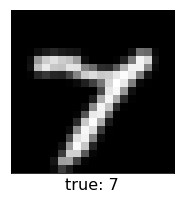

In [4]:
training_index = 2
view_digit(X_valid[training_index], y_valid[training_index])

In [5]:
print(len(X_train[0])) #number of pixels
print(sum(y_train == 3)) #number of each class in training
print(sum(y_train == 7))
print(sum(y_train == 8))
print(sum(y_train == 9))

print(sum(y_valid == 3))#number of each class in valid
print(sum(y_valid == 7))
print(sum(y_valid == 8))
print(sum(y_valid == 9))

441
1000
1000
1000
1000
250
250
250
250


The next part of this problem will involve building a `KNN` class for doing K-Nearest-Neighbors classification. Scroll down to **Part B** to see what you need to do. 

In [6]:
class KNN:
    """
    Class to store data for regression problems 
    """
    def __init__(self, X_train, y_train, K=5, distance_weighted=False):
        """
        Creates a kNN instance

        :param X_train: Training data input in 2D ndarray 
        :param y_train: Training data output in 1D ndarray 
        :param K: The number of nearest points to consider in classification
        :param distance_weighted: Bool indicating whether to use distance weighting
        """

        # Import and build the BallTree on training features 
        from sklearn.neighbors import BallTree
        self.balltree = BallTree(X_train)

        
        # Cache training labels and parameter K 
        self.y_train = y_train
        self.K = K 
        
        # Boolean flag indicating whether to do distance weighting 
        self.distance_weighted = distance_weighted
        
    def majority(self, neighbor_indices, neighbor_distances=None):
        """
        Given indices of nearest neighbors in training set, return the majority label. 
        Break ties by considering 1 fewer neighbor until a clear winner is found. 

        :param neighbor_indices: The indices of the K nearest neighbors in self.X_train 
        :param neighbor_distances: Corresponding distances from query point to K nearest neighbors. 
        """
        #print(neighbor_distances)
        #print(self.y_train)
        s= [0]*11

        if self.distance_weighted == False:
            #print(neighbor_indices[0])
            for ii in range(len(neighbor_indices) ):
                #print(s)
                #print( neighbor_indices[ii] )
                s[ self.y_train[neighbor_indices[ii]]  ] = s[ self.y_train[neighbor_indices[ii]]] + 1 #self.y_train[ neighbor_indices[ii] ]
                #print(self.y_train[neighbor_indices[ii]])
            largest = 0
            second = 0
            ind = 0
            #print(s)
            for ii in range(len(s)):
                #print(s[ii])
                if s[ii] >= largest:
                    ind = ii
                    second = largest
                    largest = s[ii]
                
            if largest == second:
                return self.majority(neighbor_indices[0:len(neighbor_indices)-1])
            #print(s)
            if ind == 10:
                ind = -1
            return ind
        else:
            for ii in range(len(neighbor_indices)):
                if( neighbor_distances[ii] == 0.0):
                    #print("found exact point", self.y_train[ neighbor_indices[ii] ] )
                    return self.y_train[ neighbor_indices[ii] ]
                #print(self.y_train[neighbor_indices[ii]])
                #print(1/(neighbor_distances[ii]))
                s[ self.y_train[neighbor_indices[ii]]  ] = s[ self.y_train[neighbor_indices[ii]]]  + 1/(neighbor_distances[ii])

            largest = 0
            for ii in range(len(s)):
                #print(s[ii])
                if s[ii] >= largest:
                    ind = ii
                    second = largest
                    largest = s[ii]
             
            if largest == second:
                #print(largest, second, neighbor_distances)
                maxdist = np.argmax(neighbor_distances)
                return self.majority(np.delete(neighbor_indices, maxdist), np.delete(neighbor_distances,maxdist) )
            if ind == 10:
                ind = -1
            return ind
        
    def classify(self, x):
        """
        Given a query point, return the predicted label 
        
        :param x: a query point stored as an ndarray  
        """
        dist, ind = self.balltree.query([x], self.K)
        inds2 = ind[0]
        dists2 = dist[0]
        print(dists2)

        if self.distance_weighted == True:
            return self.majority(inds2,neighbor_distances = dists2)
        else:
            return self.majority(inds2)
        
    def predict(self, X):
        """
        Given an ndarray of query points, return yhat, an ndarray of predictions 

        :param X: an (m x p) dimension ndarray of points to predict labels for 
        """
        yhat = np.array([0]*len(X))
        for ii in range(len(X)):
            #print( self.classify(X[ii]) )
            yhat[ii] = self.classify(X[ii])
        #print(yhat)
        return yhat

**Part B**: Modify the class above to implement an Unweighted KNN classifier.  There are three methods that you need to complete: 

- `predict`: Given an $m \times p$ matrix of validation data with $m$ examples each with $p$ features, return a length-$m$ vector of predicted labels by calling the `classify` function on each example. 
- `classify`: Given a single query example with $p$ features, return its predicted class label as an integer using KNN by calling the `majority` function. 
- `majority`: Given an array of indices into the training set corresponding to the $K$ training examples that are nearest to the query point, return the majority label as an integer.  If there is a tie for the majority label using $K$ nearest neighbors, reduce $K$ by 1 and try again.  Continue reducing $K$ until there is a winning label. 

**Notes**: 
- Don't even think about implementing nearest-neighbor search or any distance metrics yourself.  Instead, go read the documentation for Scikit-Learn's [BallTree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html) object.  You will find that its implemented [query](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree.query) method can do most of the heavy lifting for you. 
- Do not use Scikit-Learn's KNeighborsClassifier in this problem.  We're implementing this ourselves. 
- You don't need to worry about the `distance_weighted` flag until **Part C**, but we recommend reading ahead a bit. It might be good to think about your implementation of **Part C** before implementing **Part B**. 
- When you think you're done, execute the following cell to run 4 unit tests based on the example starting on Slide 24 of the [KNN Lecture](https://www.cs.colorado.edu/~ketelsen/files/courses/csci4622/slides/lesson06.pdf).  

In [7]:
%run -i tests/tests.py "prob 2A"

test1NNclassify (__main__.TestUnweightedKNN) ... ok
test2NNclassify (__main__.TestUnweightedKNN) ... ok
test3NNclassify (__main__.TestUnweightedKNN) ... ok
test3NNpredict (__main__.TestUnweightedKNN) ... 

[ 1.]
[ 1.          1.41421356]
[ 1.          1.41421356  2.23606798]
[ 1.          1.41421356  2.23606798]
[ 0.5         1.5         1.80277564]
[ 1.          1.          1.41421356]


ok

----------------------------------------------------------------------
Ran 4 tests in 0.355s

OK


**Part C**: Modify the `KNN` class to perform the distance-weighted KNN classification described in **Problem 1** when the `distance_weighted` flag is set to `True`. A word of caution: it's certainly possible that a query point could be distance $0$ away from some training example.  If this happens your implementation should handle it gracefully and return the appropriate class label.   

When you think you're done, execute the following cell to run three final unit tests corresponding to the example on Slide 43 of the [KNN Lecture](https://www.cs.colorado.edu/~ketelsen/files/courses/csci4622/slides/lesson06.pdf). Make sure that the changes you make in **Part C** do not affect the unit tests from **Part B**.   


In [8]:
%run -i tests/tests.py "prob 2B"

test5NNclassify (__main__.TestWeightedKNN) ... ok
test3NNclassify (__main__.TestWeightedKNN) ... ok
test5NNpredict (__main__.TestWeightedKNN) ... 

[ 0.5  0.5  1.   1.   1. ]
[ 0.  1.  1.]
[ 0.5  0.5  1.   1.   1. ]
[ 0.          1.          1.          2.23606798  2.23606798]


ok

----------------------------------------------------------------------
Ran 3 tests in 0.021s

OK


**Part D**: Use your `KNN` class to perform Unweighted KNN on the validation data with $K=3$ and do the following: 

- Create a **confusion matrix** (feel free to use the Scikit-Learn `confusion_matrix` function described in the [Hands-On KNN](https://github.com/chrisketelsen/CSCI-4622-Machine-Learning/blob/master/in-class-notebooks/Hands_On_KNN_Perceptron.ipynb) from class).  
- Based on your confusion matrix, which digits seem to get confused with other digits the most? 
- Find one misclassified validation example and plot it with the `view_digit` function along with plots of its three nearest neighbors in the training set. 



In [9]:
from sklearn.metrics import confusion_matrix
xpred = [0]*len(y_valid)
model = KNN(X_train, y_train, 3)

for ii in range(len(y_valid)):  
    xpred[ii] = model.classify(X_valid[ii])
    #print(xpred.classify(X_valid[5]))
#print(xpred)

#print(X_valid[2])
cm = confusion_matrix(y_valid,xpred)
print(cm)


[ 3.03431103  3.42100844  3.44108876]
[ 2.0102582   2.25605767  2.39900659]
[ 3.02826109  3.34022586  3.40629492]
[ 1.87740772  2.08231971  2.19130083]
[ 3.53801783  3.5973804   3.80661114]
[ 2.87774475  3.04272789  3.14135272]
[ 4.67817497  4.89385369  5.1344881 ]
[ 4.31177139  4.57504556  4.64244   ]
[ 2.84943184  2.97464875  3.02262391]
[ 2.28963195  2.76966875  2.92393114]
[ 3.92445776  4.07192732  4.1402944 ]
[ 2.1810057   2.22063996  2.22207996]
[ 2.41345708  2.48306838  2.52621473]
[ 2.32769132  2.48188516  2.72242739]
[ 2.30295933  2.39348404  2.73561668]
[ 3.81456768  3.9428345   4.03350062]
[ 2.50569517  3.06750152  3.09129074]
[ 2.0818987   2.23986118  2.52988292]
[ 4.08728865  4.19229626  4.39007479]
[ 2.18881502  2.19255319  2.25962336]
[ 3.5113065   3.71017906  4.48983987]
[ 2.93864728  2.97769486  3.13032568]
[ 2.32528849  2.82046947  2.88565371]
[ 2.47698208  2.63346108  2.70879922]
[ 4.21440199  4.23515069  4.24302671]
[ 2.2937221   2.45001393  2.7348211 ]
[ 2.63918072

[ 2.24085651  2.28186775  2.35387563]
[ 1.56275863  1.68081195  2.06989367]
[ 1.88218954  2.41382663  2.68002708]
[ 2.35550514  2.41224927  2.47175509]
[ 2.88939516  3.32336688  3.57380146]
[ 3.48174125  3.55047527  3.81885083]
[ 3.73053528  3.77345593  3.81275304]
[ 3.00572055  3.07888844  3.15015973]
[ 3.41146719  3.4963418   3.67203131]
[ 1.8196501   2.93142173  2.9691584 ]
[ 3.26106197  3.52701008  3.61522263]
[ 1.78783965  2.13160613  2.40878502]
[ 1.64526513  2.07003855  2.20030056]
[ 3.76023632  3.80269639  4.04582555]
[ 2.45671486  2.58168512  2.71005929]
[ 2.60102603  2.66913957  2.73993913]
[ 2.64559437  2.6479737   2.73258211]
[ 3.36918437  3.47063255  3.47153416]
[ 1.98770539  2.18249652  2.27234177]
[ 1.68028119  1.86370254  1.9082008 ]
[ 1.90004755  1.90044816  2.05170759]
[ 2.28349813  2.73927393  3.16554888]
[ 2.86942546  2.99223396  3.07447229]
[ 2.77367756  2.77736498  3.23737544]
[ 2.40904996  2.47330694  2.49043692]
[ 3.6940552   3.95504535  4.05142453]
[ 3.696365  

[ 2.44635485  2.46718408  2.49736809]
[ 1.6228899   1.79583867  1.85710187]
[ 2.84339147  3.04168401  3.09930974]
[ 3.33995881  3.36873702  3.39577049]
[ 1.92525457  2.06376252  2.07372015]
[ 2.84928612  3.03602616  3.14687984]
[ 2.34808977  2.41333282  2.48033248]
[ 2.71880404  2.8984982   3.13402284]
[ 3.61848601  3.66669183  3.73007149]
[ 3.19065822  3.2531675   3.25393087]
[ 3.38325024  3.58500015  3.99216071]
[ 1.77478603  2.10059218  2.21340504]
[ 1.92217277  1.99325275  2.03346852]
[ 1.81723561  1.84370871  1.86300514]
[ 2.80784861  3.01479117  3.02797415]
[ 3.41610497  3.44211651  3.48317867]
[ 3.17328574  3.19909397  3.22532987]
[ 3.70312586  3.82367219  4.00157985]
[ 2.91742567  3.07075601  3.29008624]
[ 2.80125199  2.86352393  2.89120423]
[ 2.64102726  2.80770347  3.0170501 ]
[ 3.01189746  3.0298629   3.08937981]
[ 3.0873855   3.11580658  3.23720205]
[ 1.96348833  2.30143629  2.49061908]
[ 2.62075236  2.82780722  2.93895602]
[ 3.17928464  3.2521557   3.41907488]
[ 2.2399367 

[ 2.96505082  3.2466728   3.41272919]
[ 2.52123012  2.59614952  2.71261453]
[ 1.74088056  2.59280642  2.76562354]
[ 2.1428816   2.33448974  2.39728797]
[ 2.25684826  2.49395733  2.5526731 ]
[ 3.49199997  3.52505177  3.60986942]
[ 3.74132651  4.22983672  4.53099709]
[ 2.08196887  2.38885017  2.44331979]
[ 3.49303035  3.59073094  3.60760443]
[ 4.33542492  4.35955689  4.41946344]
[ 2.2496751   2.48838903  2.51876769]
[ 2.72856929  3.52461984  3.56150982]
[ 1.73576265  1.94355568  2.40012174]
[ 2.66589666  2.91594933  3.1312246 ]
[ 2.18393703  2.89579631  3.14212612]
[ 2.68262239  2.83910465  3.03043387]
[ 2.87405502  3.03256451  3.13024216]
[ 1.13703176  1.42199453  1.50229352]
[ 1.86493576  2.79571815  2.81300872]
[ 2.67697546  3.14618337  3.16236763]
[ 1.64833751  2.70667792  2.95008585]
[ 2.02802359  2.04537531  2.07083703]
[ 2.740621    2.87530417  3.05031496]
[ 2.70253274  2.77775532  3.0688824 ]
[ 2.36765985  2.48675693  2.48985639]
[ 2.81467566  3.27538558  3.48653697]
[ 1.64572775

[ 4.60789654  4.85672936  4.89413336]
[ 2.96766374  2.99913098  3.01539814]
[ 2.13724051  2.21740693  2.23492945]
[ 2.20868928  2.62243595  2.80501556]
[ 1.63566084  2.03549812  2.12211946]
[ 2.06685641  2.3114645   2.37744108]
[ 2.45481112  2.57163422  2.57472111]
[ 3.86258584  3.91257007  4.27479941]
[ 2.89971296  3.18980498  3.20320629]
[ 2.85052994  2.98986112  3.13716421]
[ 2.99088195  3.67821397  3.70808525]
[ 4.68388814  4.81484472  4.91844601]
[ 2.60296167  2.66880537  2.80134531]
[ 3.17439051  3.54814419  3.60316192]
[ 2.18119255  2.24293843  2.27919733]
[ 3.20299744  3.31674535  3.59710251]
[ 1.93466923  2.06429525  2.12523333]
[ 3.42321046  3.43051418  3.45151511]
[ 4.06863832  4.13440846  4.16777517]
[ 3.51665669  3.61865175  3.78424464]
[ 3.49385136  3.69191059  3.97994395]
[ 3.08114031  3.20245004  3.72875193]
[ 2.37419486  2.49671218  2.76571251]
[ 2.18766245  2.29661001  2.32839484]
[ 3.6724815   4.17878423  4.27386935]
[ 2.64698039  2.65273466  2.72189635]
[ 2.53429837

The confusion matrix struggles the most with saying an 8 is a 9, an 8 is a 3, and a 3 is an 8. After those the error drops fast with the largest error now with saying a 9 is a 7 and a 7 is a 9.

at index,  6 calssified  9 as  8
[3123 1777 3592]


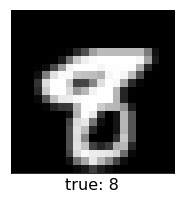

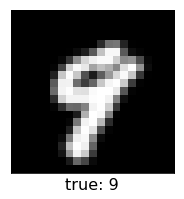

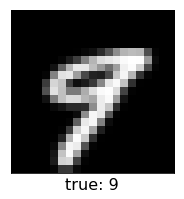

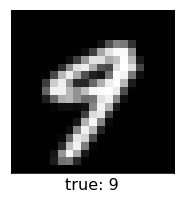

In [10]:
for ii in range(len(X_valid)):
    if( xpred[ii] != y_valid[ii] ):
        print("at index, ",ii, "calssified ", xpred[ii], "as ", y_valid[ii])
        break
d, ind = model.balltree.query([X_valid[6]], 3)
ind = ind[0]
print(ind)
view_digit(X_valid[6], y_valid[6])

view_digit(X_train[ind[0]], y_train[ind[0]])
view_digit(X_train[ind[1]], y_train[ind[1]])
view_digit(X_train[ind[2]], y_train[ind[2]])


**Part E**: Create a plot of the accuracy of both Unweighted and Distance-Weighted KNN on the validation set on the same set of axes for $K=1, 2, \ldots, 20$ (feel free to go out to $K=30$ if your implementation is efficient enough to allow it).  Answer the following questions: 

- For general $K$, does Unweighted or Weighted KNN appear to perform better? 
- Which value of $K$ attains the best accuracy on the validation set? 



In [11]:
modelw = KNN(X_train, y_train, 10,distance_weighted=True)
modelw.classify(X_valid[0])

[ 3.03431103  3.42100844  3.44108876  3.47108006  3.60526762  3.66125846
  3.74883501  3.80102578  3.80425913  3.80587781]


8

In [188]:
def error_rate(C):
    return 1- (np.sum(np.diag(C)))/C.sum()

In [189]:
errArray = [0]*21
errwArray = [0]*21

for ii in range(1,21):
    xpredw = [0]*len(y_valid)
    xpred = [0]*len(y_valid)
    modelw = KNN(X_train, y_train, ii,distance_weighted=True)
    model = KNN(X_train, y_train, ii,distance_weighted=False)

    for jj in range(len(y_valid)):  
        xpred[jj] = model.classify(X_valid[jj])
        xpredw[jj] = modelw.classify(X_valid[jj])
        #print(xpred.classify(X_valid[5]))
    #print(xpred)

    #print(X_valid[2])
    cm = confusion_matrix(y_valid,xpred)
    cmw = confusion_matrix(y_valid,xpredw)
    errArray[ii] = error_rate(cm)#1000-(cm[3,3] + cm[1,1] + cm[2,2] + cm[0,0])
    errwArray[ii] = error_rate(cmw)#1000-(cmw[3,3] + cmw[1,1] + cmw[2,2] + cmw[0,0])
    print(ii, "out of", 20)
errArray.remove(0)
errwArray.remove(0)

1 out of 20
2 out of 20
3 out of 20
4 out of 20
5 out of 20
6 out of 20
7 out of 20
8 out of 20
9 out of 20
10 out of 20
11 out of 20
12 out of 20
13 out of 20
14 out of 20
15 out of 20
16 out of 20
17 out of 20
18 out of 20
19 out of 20
20 out of 20


In [190]:
#oe = errArray
#oew = errwArray

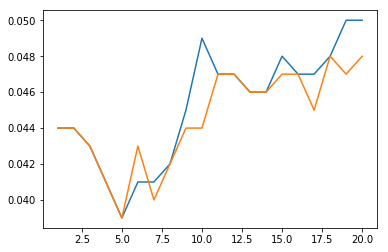

In [191]:
y = [0]*20
for ii in range(0,20):
    y[ii] = ii+1
#print(y)
#len(errArray)
#print(errArray)
#print(errwArray)
fig, ax = plt.subplots()
ax.plot(y, errArray)
ax.plot(y,errwArray)

### [15 points] Problem 3 - Perceptron Learning By Hand 
***

Consider the following two-feature training set 

$$
\{({\bf x}_1 = (1,1), y_1 = 1),~({\bf x}_2 = (1,-1), y_2 =-1),~({\bf x}_3 = (-1,-1), y_3 = 1),~({\bf x}_4 = (-1,1), y_4 = -1)\}
$$


**Part A**:  Perform one pass of the Perceptron Algorithm by hand in the order $1,~2,~3,~4$ starting with the initial weights and bias ${\bf w} = (0,1)$ and $b = 0$.  Show each step in the Perceptron Algorithm and each intermediate set of weights in Markdown. 

$$[0,1] [1,1]^T + 0 = 1 > 0 \implies \hat{y_1} = 1 = y_1 $$
$$[0,1] [1,-1]^T + 0 = -1 < 0 \implies \hat{y_2} = -1 = y_2 $$
$$[0,1] [-1,-1]^T + 0 = -1 < 0 \implies \hat{y_3} = -1 \neq y_3 $$
Updating the weights and bias,
$$w = [0,1] + 1[-1,-1] = [-1,0] $$
$$b = 0 + 1 = 1 $$
$$[-1,0] [-1,1]^T + 1 = 2 > 0 \implies \hat{y_4} = 1 \neq y_4 $$
Updating weights and bias again,
$$w = [-1,0] + -1[-1,1] = [0,-1] $$
$$b = 1 + -1 = 0 $$

**Part B**:  What label would your final Perceptron classifier predict for each of the training points? 

For $x_1$: $\hat{y_1} = -1$ wrong

For $x_2$: $\hat{y_2} = 1$ wrong

For $x_3$: $\hat{y_3} = 1$ correct

For $x_4$: $\hat{y_4} = -1$ correct

**Part C**:  Is it possible that your Perceptron classifier would ever perfectly classify all training examples after more passes of the Perceptron Algorithm?  Clearly explain your reasoning. 

No becuase the data in the training examples is not linearly separable i.e. there is no way to draw a line that separates the 0's from the 1's.

### [35 points] Problem 4 - The Margin and Convergence of the Perceptron Learning Algorithm 
***

In this problem you will implement the Perceptron Learning Algorithm and use it to explore the convergence of the algorithm on linearly separable simulated data sets with particular properties.  Take a look at the `Perceptron` class below. 

In [192]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data 
    """
    def __init__(self, n=100, margin=0.1, random_state=1241, X=None, y=None):
        """
        Initializes Perceptron class.  Generates training data and sets parameters. 
        
        :param n: the number of training examples
        :param margin: the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X: Input training features.  Only used for unit testing. 
        :param y: Input training labels.  Only used for unit testing. 
        """
        
        # initalize random seed 
        np.random.seed(random_state)
        
        # initialize parameters  
        self.n, self.M = n, margin
        
        # generate random simulated data 
        self.X_train, self.y_train = self.gen_data()
        
        # only used for unit tests 
        if X is not None and y is not None: self.X_train, self.y_train, self.n = X, y, X.shape[0]
        
        # initialize weights and bias to zero 
        self.w = np.array([1.0,0.0])
        self.b = 0 
        
        # initialize total mistake counter 
        self.num_mistakes = 0 
        
    def train(self, max_epochs=1000000):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 
        
        :param max_epochs: Maximum number of epochs to perform before stopping.  Use for development. 
        """
        
        self.w = self.w
        self.b = self.b
        iters = 0
        correct = False
        #print(len(self.y_train))
        #print(len(self.X_train))
        while (iters < max_epochs) and (correct == False):
            rnd = np.random.permutation(len(self.X_train))
            c = 1
            for ii in range(len(self.X_train)):
                yhat = np.dot(self.X_train[rnd[ii],:],self.w) + self.b
                if (yhat*self.y_train[rnd[ii]]) <= 0:
                    #print("fixing")
                    self.num_mistakes = self.num_mistakes + 1
                    c = 0
                    self.w = self.w + self.y_train[rnd[ii]]*(self.X_train[rnd[ii],:])
                    self.b = self.b + self.y_train[rnd[ii]]
            iters = iters + 1
            if c == 1:
                correct = True

        
    def plot_model(self):
        """
        Plots the simulated data.  Plots the learned decision boundary (#TODO) 
        """
        #print(self.b/self.w[1] + self.w[0]/self.w[1])
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
        colors = ["steelblue" if yi==-1 else "#a76c6e" for yi in self.y_train]
        ax.scatter(self.X_train[:,0], self.X_train[:,1], color=colors, s=75)
        xplot=np.array([-1 ,1]) 
        #print(-self.b/self.w[1] + self.w[0]/self.w[1], "ptsd ", -self.b/self.w[1] - self.w[0]/self.w[1])
        yplot=np.array( [-self.b/self.w[1] + self.w[0]/self.w[1] , -self.b/self.w[1] - self.w[0]/self.w[1]]) 
        ax.plot(xplot, yplot, color="black", lw=2)
        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)
        
    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1,1])
        pos_x1 = np.random.uniform(-1/np.sqrt(2), 1/np.sqrt(2), int(self.n/2))
        pos_x2 = np.random.uniform(self.M+flip*0.1,1/np.sqrt(2),int(self.n/2))
        pos_x2[-1] = self.M+flip*0.1 
        neg_x1 = np.random.uniform(-1/np.sqrt(2), 1/np.sqrt(2), int(self.n/2))
        neg_x2 = np.random.uniform(-1/np.sqrt(2),-self.M+flip*0.1,int(self.n/2))
        neg_x2[-1] = -self.M+flip*0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)), np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array([[np.cos(np.pi/6), np.sin(np.pi/6)], [-np.sin(np.pi/6), np.cos(np.pi/6)]]))
        y = np.array([+1]*int(self.n/2) + [-1]*int(self.n/2))
        rand_order = np.random.choice(range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]
                                   
        

**Part A**: The `Perceptron` class above has the capability to generate it's own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them.  Experiment with the `margin` parameter (good values to try are between $0.01$ and $0.4$).  Explain what the `margin` parameter is doing. 

tests/tests.py:76: RuntimeWarning: invalid value encountered in double_scalars
  for yihat, yi in zip(yhat, [-1, 1]):
tests/tests.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  for yihat, yi in zip(yhat, [-1, 1]):


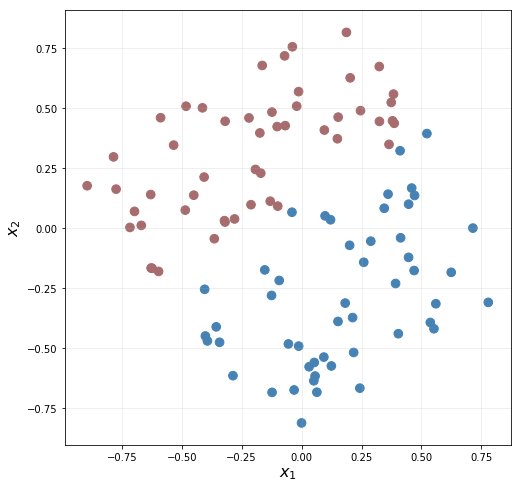

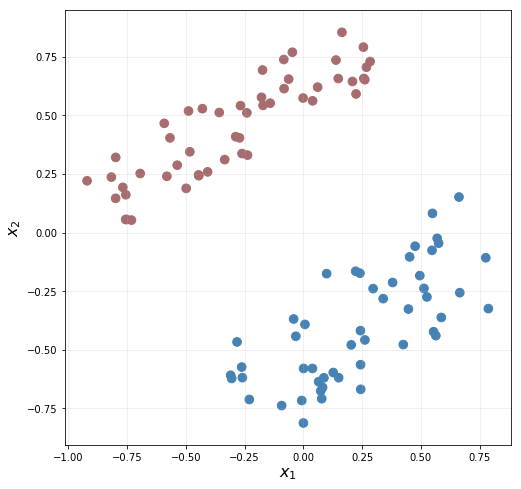

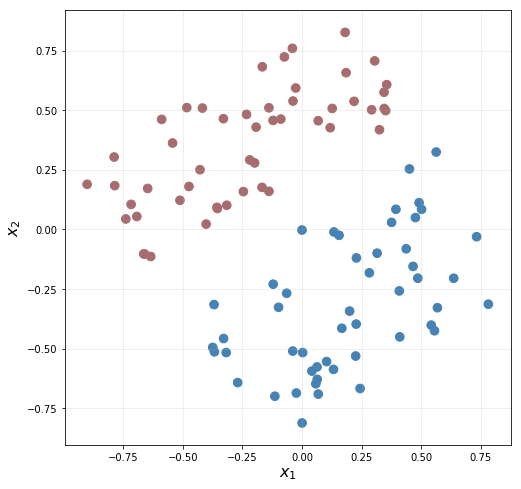

In [193]:
perc = Perceptron(n=100, margin=0.02, random_state=1241)
perc.plot_model()
perc = Perceptron(n=100, margin=0.3, random_state=1241)
perc.plot_model()
perc = Perceptron(n=100, margin=0.1, random_state=1241)
perc.plot_model()

The margin parameter is determining how separated the data is. The larger the margin the farther away the data is from the decision boundary.

**Part B**: Modify the `train` method in the `Perceptron` class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should: 

- visit all training examples in a random shuffled order over each training epoch 
- terminate when you perform an entire epoch without making a single classification error on the training data 
- use the `self.num_mistakes` counter to count the total number of classification errors that are made over the entire training process 

When you think you're done, execute the cell below to run a unit test based on the example starting on Slide 9 of the the [Perceptron Lecture](https://www.cs.colorado.edu/~ketelsen/files/courses/csci4622/slides/lesson07.pdf).  

**Notes**: 
- You should not use Scikit-Learn's Perceptron object in your solution. 
- It's a good idea to implement a stopping criterion based on the `max_epochs` parameter right away.  Later we'll look at training sets that will terminate on their own, but implementing this stop will save you some pain in the development process.  
- Do not change the initial guess for the weights and bias.  These values were chosen to match the example done in lecture for the unit tests. 

In [194]:
%run -i tests/tests.py "prob 4A"

TestNegMistake (__main__.TestPerceptron) ... ok
TestPosMistake (__main__.TestPerceptron) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.010s

OK


**Part C**: Modify the `plot_model` method so that it plots the learned decision boundary with the training data.  Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot. 


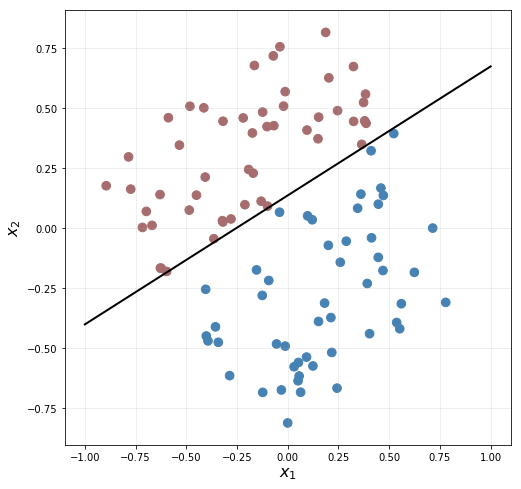

In [195]:
perc = Perceptron(n=100, margin=0.02, random_state=1241)
perc.train()
#print(perc.w)
#print(perc.b)
perc.plot_model()

**Part D**: In lecture we stated that the time it takes to train the Perceptron on a linearly separable training set is determined by the `margin` of the training data. Recall that the margin of a linear classifier is the distance from the decision boundary to the closest training point (Yes, I just answered **Part A** for you). 

An important theorem for Perceptron training states that if you train a perceptron on linearly separable training data with margin $M > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron Training Algorithm will complete after making at most $1/M^2$ classification mistakes (and thus, at most $1/M^2$ updates of the weights and bias). 

In this exercise you will empirically verify this theorem: 
- Train 20 perceptrons on randomly generated training sets of size $n=100$ with margins of $M=0.3, 0.1, 0.01, 0.001,$ and $0.0001$ (be sure to change the value of `random_state` for each run).
- Compute the **average** number of mistakes for each margin. 
- Produce a log-log plot with $1/M$ on the horizontal axis and average number of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes. 

Based on the plot, can you say that we have good empirical evidence that the theorem is true?  Briefly justify your conclusion based on your plot. 

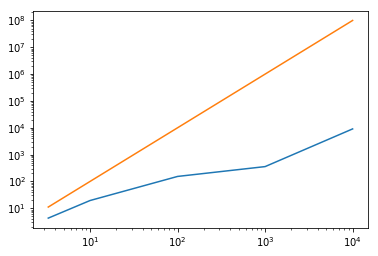

In [196]:
errors = [0.0]*5
M = [0.3,0.1,0.01,0.001,0.0001]
for jj in range(len(M)):
    for ii in range(20): 
        perc = Perceptron(n=100, margin=M[jj], random_state=(1241-3*ii))
        perc.train()
        errors[jj] = errors[jj] + perc.num_mistakes
    errors[jj] = errors[jj]/20

#print(errors)
oneoverM = [1/0.3, 1/0.1, 1/0.01, 1/0.001, 1/0.0001]
oneoverMsq = [1/(0.3)**2, 1/(0.1)**2, 1/(0.01)**2, 1/(0.001)**2, 1/(0.0001)**2]
fig, ax = plt.subplots()
ax.loglog(oneoverM, errors)
ax.plot(oneoverM, oneoverMsq)
    

Yes, we can say that the theory is most-likely true because we see a significant distance between the theoretical maximum and the emperical value. But, if we really wanted to test this theory we should do many non-averaged trials and see what the maximum is and if it is near the theoretical maximum or not.